# Keşifsel Veri Analizi

## Özellik Mühendisliği - 1

Bu ödevde Öğrencilerin Sınav Performansı'na ait verileri kullanacaksınız. 

Kaynak: https://www.kaggle.com/spscientist/students-performance-in-exams/home

### Q1

Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

---
- Histogramlari inceleyerek baslayabiliriz.

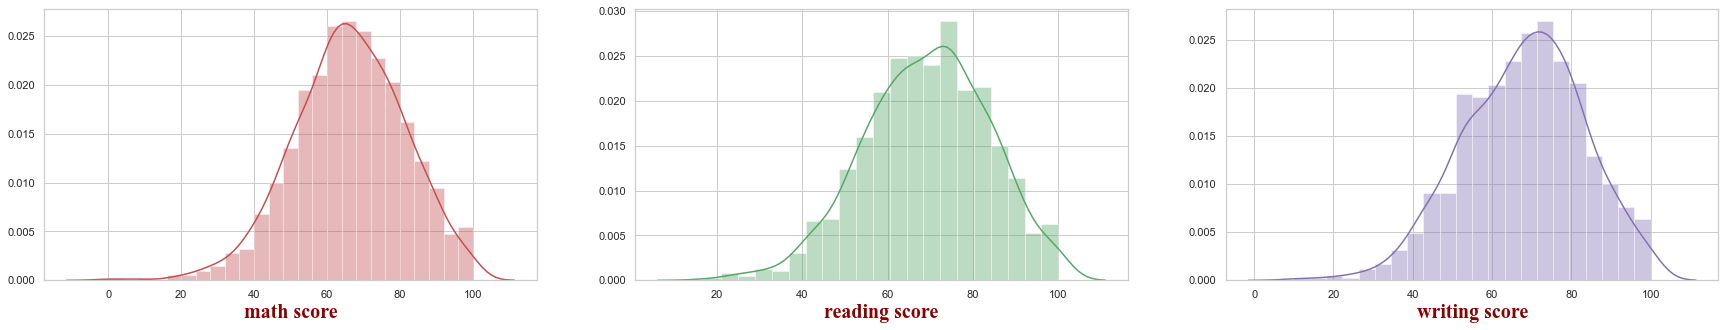

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
#from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
# to display more (100) columns in pandas display() method
pd.set_option('display.max_columns', 100)
# custom font defs
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 20}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 20 }

df = pd.read_csv('StudentsPerformance.csv')


columns = ['math score', 'reading score', 'writing score']


fig, ax = plt.subplots(1, 3, figsize=(30, 5))
colors = ['r', 'g', 'm']
for i, column in enumerate(columns):
    sns.distplot(df[column], kde=True, color=colors[i], ax=ax[i], )
    ax[i].set_xlabel(column, fontdict=axis_font);
plt.show()

- Sinav notlarinin dagilimi normal dagilima benzer ancak tam olarak normal dagilim degildir.

- Asagidaki jarque-bera (JB) testinde de p value 0.05 ten kucuk ciktigindan normal dagilim olmadigi anlasilmaktadir. 
    - $JB(PValue>0.05)=$ Normal Distribution, $JB(PValue<0.05)=$ Non-Normal Distribution

In [54]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(df[ozellik])
    norm_stats = normaltest(df[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91226,0.00035,15.40896,0.00045
1,reading score,11.38330,0.00337,11.11741,0.00385
2,writing score,13.98509,0.00092,13.60645,0.00111


- Verileri normallestirmek icin scklearn kutuphanesinin normalize metodunu kullanabiliriz.

In [55]:
from sklearn.preprocessing import normalize

df["norm_math_score"] = normalize(np.array(df["math score"]).reshape(1,-1)).reshape(-1,1)
df["norm_reading_score"] = normalize(np.array(df["reading score"]).reshape(1,-1)).reshape(-1,1)
df["norm_writing_score"] = normalize(np.array(df["writing score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["math score","norm_math_score","reading score","norm_reading_score",
                    "writing score","norm_writing_score"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
math score            0.00000
norm_math_score       0.00000
reading score        17.00000
norm_reading_score    0.00760
writing score        10.00000
norm_writing_score    0.00454
dtype: float64

Maksimum Değer
-----------------
math score           100.00000
norm_math_score        0.04664
reading score        100.00000
norm_reading_score     0.04473
writing score        100.00000
norm_writing_score     0.04535
dtype: float64


- Normallestirdigimiz verilerin histogramini inceleyelim ve JB testinden gecirelim

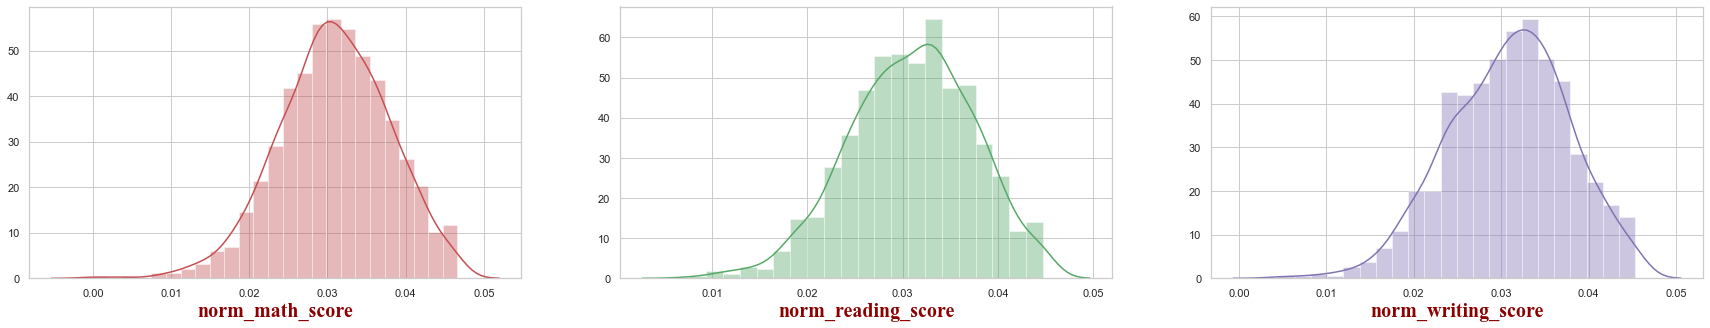

In [56]:
columns = ['norm_math_score', 'norm_reading_score', 'norm_writing_score']


f, axes = plt.subplots(1, 3, figsize=(30, 5))
colors = ['r', 'g', 'm']
for i, column in enumerate(columns):
    sns.distplot(df[column], kde=True, color=colors[i], ax=axes[i])  
    axes[i].set_xlabel(column, fontdict=axis_font)
plt.show()

In [57]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ['norm_math_score', 'norm_reading_score', 'norm_writing_score']
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(df[ozellik])
    norm_stats = normaltest(df[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_math_score,15.91226,0.00035,15.40896,0.00045
1,norm_reading_score,11.38330,0.00337,11.11741,0.00385
2,norm_writing_score,13.98509,0.00092,13.60645,0.00111


***Normallestirilen veriler hala testten gecemedi, bunun nedeni asiri degerlerden kurtulmamis olmamiz olabilir mi? [Outliers](#Outliers) bolumunde bu konuya bakilacak***

### Q2

Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

---
- Jacque-bera testinden normal dagilimda olmadigi anlasiliyor.

In [58]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

df['score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
ozellik = 'score'

jb_stats = jarque_bera(df[ozellik])
norm_stats = normaltest(df[ozellik])
dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,score,15.45339,0.00044,15.18672,0.00050


- Scikit-learn normalize metodu ile normallestirebiliriz.

In [59]:
from sklearn.preprocessing import normalize

df["norm_score"] = normalize(np.array(df["score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["score","norm_score"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
score        9.00000
norm_score   0.00411
dtype: float64

Maksimum Değer
-----------------
score        100.00000
norm_score     0.04566
dtype: float64


- Tekrar JB testinden gecirelim

In [60]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
ozellik = 'norm_score'

jb_stats = jarque_bera(df[ozellik])
norm_stats = normaltest(df[ozellik])
dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_score,15.45339,0.00044,15.18672,0.00050


***Normallestirilen veriler hala testten gecemedi, bunun nedeni asiri degerlerden kurtulmamis olmamiz olabilir mi? [Outliers](#Outliers) bolumunde bu konuya bakilacak***

### Q3

Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

---
***Kategorik-Surekli degisken ciftlerinin analizi***
- Cubuk grafigi ile gorsellestirelim
    - Butun degiskenler hedef degiskenimizle iliskili gorunuyor. Veri kumemizde butun degiskenleri tutmaliyiz.

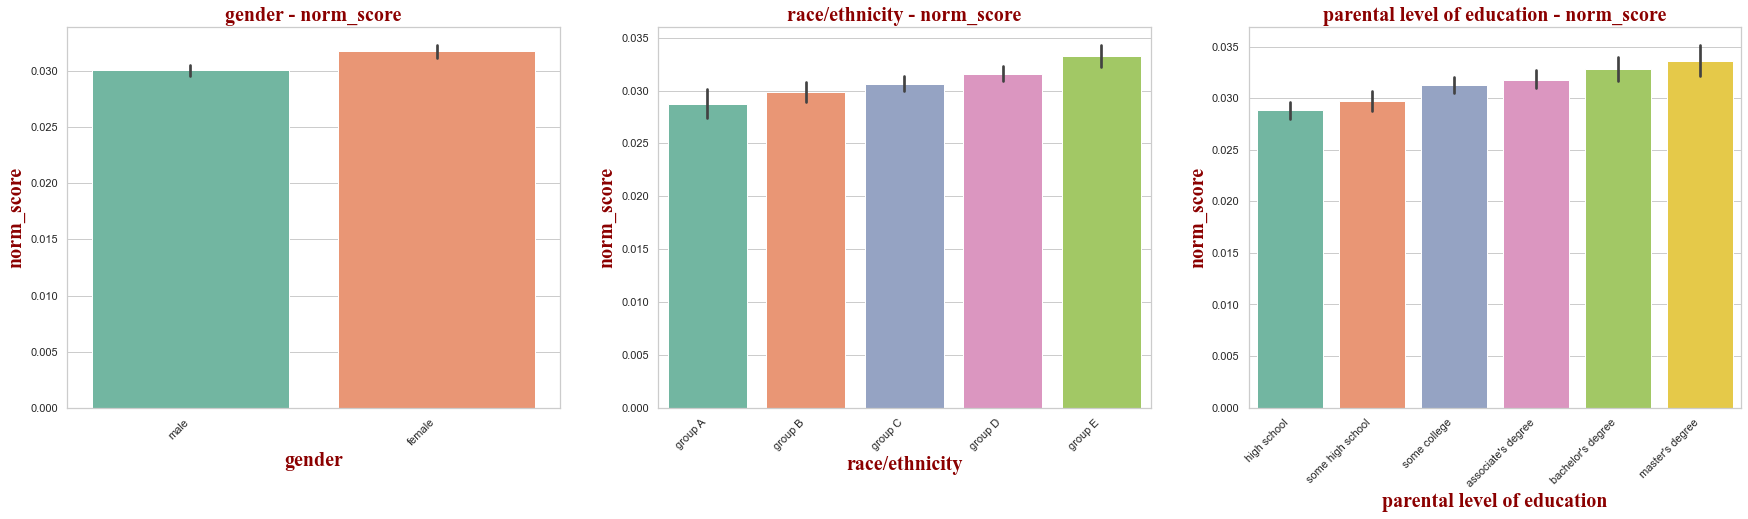

In [61]:
i = 1
column = 'norm_score'
categories = ['gender', 'race/ethnicity', 'parental level of education'] 
plt.figure(figsize=(30,7))

for category in categories :    
    result = df.groupby([category])[column].aggregate(np.mean).reset_index().sort_values(column)
    plt.subplot(1,3,i)
    sns.barplot(df[category], df[column], palette="Set2", order = result[category])
    plt.title(category + ' - ' + column, fontdict = title_font)
    plt.xlabel(category, fontdict=axis_font)
    plt.ylabel(column, fontdict=axis_font)
    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
    i += 1
    
plt.show()


### Outliers

Aykiri veriler temizlendikten sonra da normallestirilen veriler testten gecebilecek mi inceleyelim.


---
- Boxplot ile kutu grafigini inceleyelim

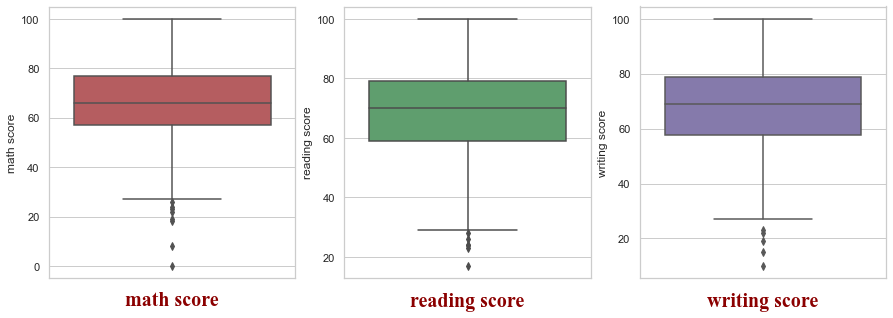

In [91]:
dfout = pd.read_csv('StudentsPerformance.csv')

columns = ['math score', 'reading score', 'writing score']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors = ['r', 'g', 'm']
for i, column in enumerate(columns):
    sns.boxplot(y=dfout[column], color=colors[i], ax=ax[i] )
    ax[i].set_xlabel(column, fontdict=axis_font);
plt.show()

- Kutu grafiginde aykiri degerlerin kucuk degerler tarafinda goruldugunden winsorize metodunu tek yonlu calistirabiliriz.
- Once yuzde 95 lik dilimi (soldan 0.05 winsorize) kullandik ancak cok fazla veri kaybi oldu.
- Deneme yanilma ile:
    - matematik notlari icin 0.008
    - okuma notlari icin 0.0065
    - yazma notlari icin 0.005 winsorize parametrelerini tespit ettik

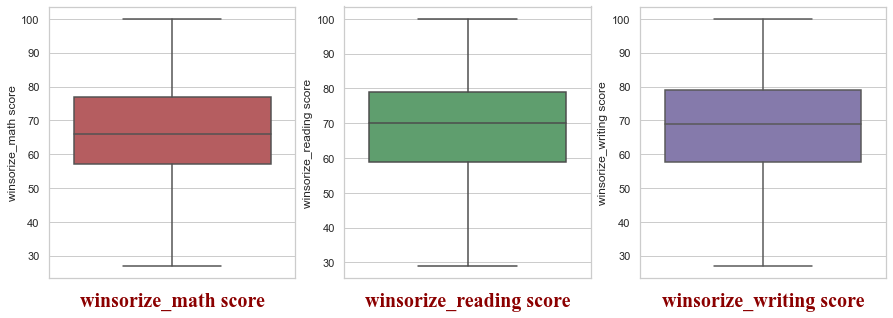

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorize_math score,winsorize_reading score,winsorize_writing score
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74
1,female,group C,some college,standard,completed,69,90,88,69,90,88
2,female,group B,master's degree,standard,none,90,95,93,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44
4,male,group C,some college,standard,none,76,78,75,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65,59,71,65
998,female,group D,some college,standard,completed,68,78,77,68,78,77


In [127]:
from scipy.stats.mstats import winsorize

columns = ['math score', 'reading score', 'writing score']
wins = [0.008,0.0065,0.005]

for i,column in enumerate(columns):
    dfout['winsorize_'+column] = winsorize(dfout[column], (wins[i], 0))
    
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors = ['r', 'g', 'm']
for i, column in enumerate(columns):
    sns.boxplot(y=dfout['winsorize_'+column], color=colors[i], ax=ax[i] )
    ax[i].set_xlabel('winsorize_'+column, fontdict=axis_font);
plt.show()


- JB testini normalize etmeden once bi uygulayalim

In [126]:

ozellikler = ["winsorize_math score", "winsorize_reading score", "winsorize_writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(dfout[ozellik])
    norm_stats = normaltest(dfout[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,winsorize_math score,5.71205,0.05750,5.95534,0.05091
1,winsorize_reading score,9.76094,0.00759,10.10159,0.00640
2,winsorize_writing score,11.64095,0.00297,12.66339,0.00178


- Matemetik notlari sadece aykiri degerlerden arindirarak normalize edebildik. (p degeri > 0.05)
- Diger notlari simdi normalize edip JB testine tabi tutabiliriz.

In [128]:
from sklearn.preprocessing import normalize

# winsorized math scores are already normally distributed
dfout["norm_math_score"] = dfout["winsorize_math score"]
# normalize other scores
dfout["norm_reading_score"] = normalize(np.array(dfout["winsorize_reading score"]).reshape(1,-1)).reshape(-1,1)
dfout["norm_writing_score"] = normalize(np.array(dfout["winsorize_writing score"]).reshape(1,-1)).reshape(-1,1)

ozellikler = ["norm_math_score", "norm_reading_score", "norm_writing_score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(dfout[ozellik])
    norm_stats = normaltest(dfout[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_math_score,5.71205,0.05750,5.95534,0.05091
1,norm_reading_score,9.76094,0.00759,10.10159,0.00640
2,norm_writing_score,11.64095,0.00297,12.66339,0.00178
